In [5]:
!pwd

/Users/justinmcelderry/jmcelderry/lessons /lesson-05/code


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

df = pd.read_csv("./datasets/dataset.csv")

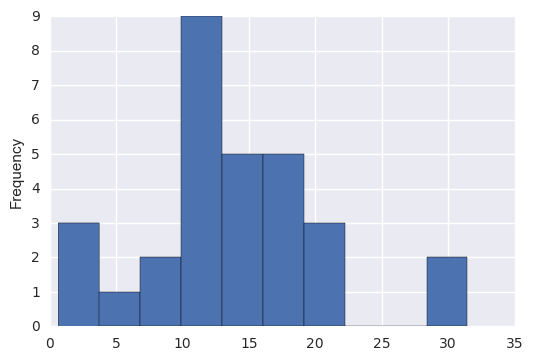

In [28]:
# create a histogram for the dataFrame
measurements = df.measurements
measurements.plot( kind = "hist" )

In [29]:
# find the length of measurements
n = len( measurements )

In [30]:
# get the mean and standard_deviation of the dataset
mean = measurements.mean()
print mean

stdev = measurements.std()
print stdev

14.0224282791
6.73042721173


In [31]:
# sort measurements from least to greatest
measurementsSorted = np.sort( measurements )

In [32]:
print( measurementsSorted )

[  0.65420069   2.51073122   3.57326044   6.32880343   9.6196068
   9.68612379   9.93590727   9.95752217  10.43264987  11.52707377
  11.66162395  11.95896084  12.13868406  12.61624737  12.82338917
  14.64197822  14.975124    15.52200558  15.81075811  15.82163004
  16.85730122  16.95646689  17.40759363  17.53112835  17.56077884
  20.1448896   20.22467755  20.95836562  29.37931847  31.45604741]


In [33]:
# generate n numbers from a normal distribution with same mean and stdev
# sort these numbers from least to greatest

numsNormal = np.random.normal(loc=mean, scale=stdev, size=n)
numsNormal = np.sort( numsNormal )

In [34]:
# generate n numbers from a exponential distribution, note you need the rate parameter for exponential

numsExponential = np.random.exponential( scale = mean, size=n )
numsExponential = np.sort( numsExponential )

In [35]:
# generate n numbers from a uniform distribution, note you need a, and b parameters for uniform ( min and max )

minNum = measurements.min()
maxNum = measurements.max()

numsUniform = np.random.uniform( low = minNum, high = maxNum, size = n )
numsUniform = np.sort( numsUniform )

In [36]:
# print a scatter plot of actual quantiles (your sorted dataset) vs hypothetical quantiles (generated numbers)
# from each distribution.

objects = {
            "measurements" : measurementsSorted, 
            "numsNormal"   : numsNormal, 
            "numsExponential" : numsExponential,
            "numsUniform" : numsUniform
          }

df = pd.DataFrame( objects ) 

In [37]:
import statsmodels.formula.api as smf 
## How do I loop this function and run multiple regression models at the same time

formulas = ['measurements ~ numsNormal', 
            'measurements ~ numsExponential',
            'measurements ~ numsUniform' 
           ]

def fitModel(formula):
    return smf.ols(formula, data=df).fit()


## For loop way of doing it 
    for formula in formulas:
        results = fitModel(formula)
        print results.summary()

## List Comprehension way of doing it 
    #[ fitModel(formula).summary() for formula in formulas ]


## Functional Programming way of doing it 
    #map( lambda formula: fitModel(formula).summary, formulas)



## How do I figure out what the equation would be? 
    #formula = 'numsNormal ~ measurements'
    #lm = smf.ols(formula, data=df).fit()

#print lm.summary()

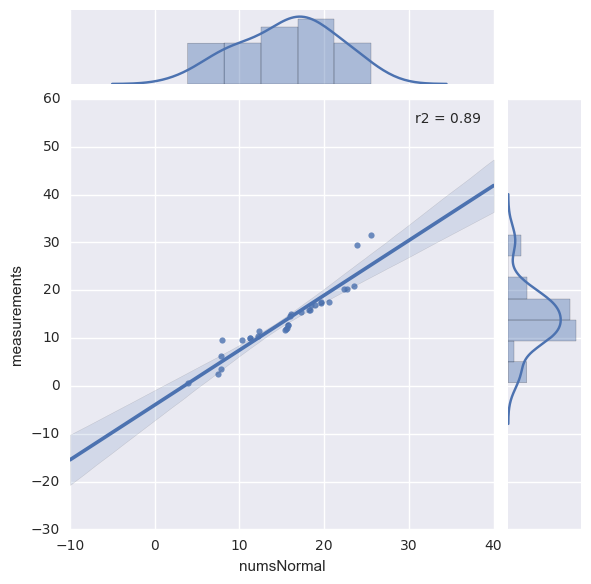

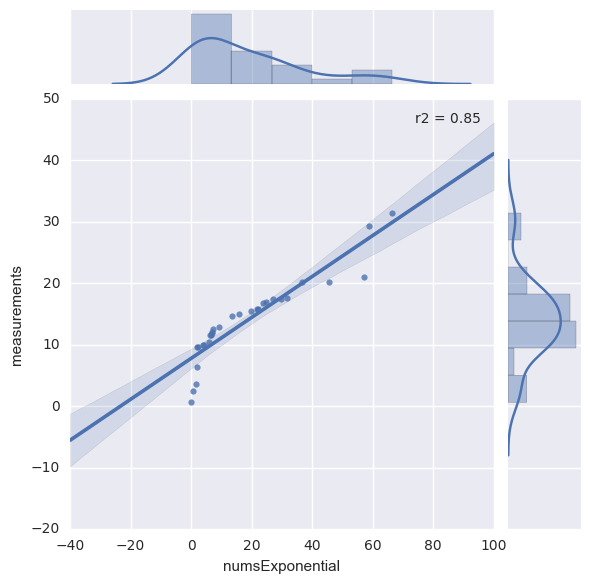

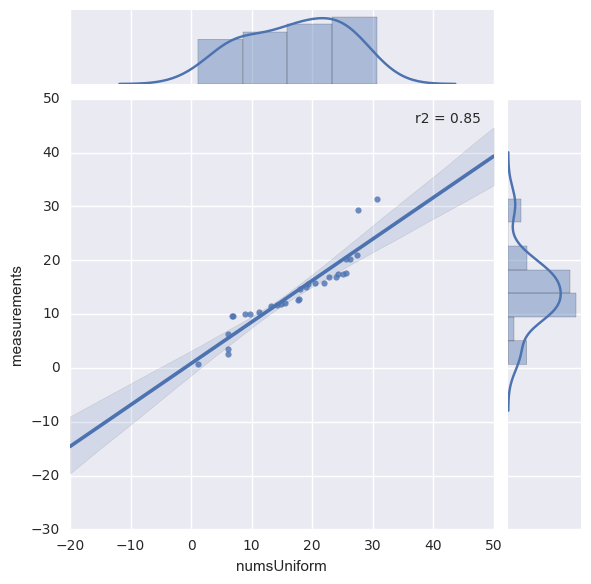

In [22]:
import seaborn as sns
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(df.numsNormal, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsExponential, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsUniform, df.measurements, kind="reg", stat_func=r2)

In [ ]:
# Looks for an equation closest y = x and also which data sets are a good fit 
# 